# Description of the system

In this notebook we will create the figures we need in the System Chapter 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.constants import pi, c, hbar, epsilon_0, e, m_e, m_p, N_A, k
import cmath
import os 
import re
from scipy.optimize import curve_fit
from IPython.display import Image
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from fig_config import (
    add_grid,
    figure_features,
)  # <--- import customized functions



figure_features()

We will start with the potential we use. 

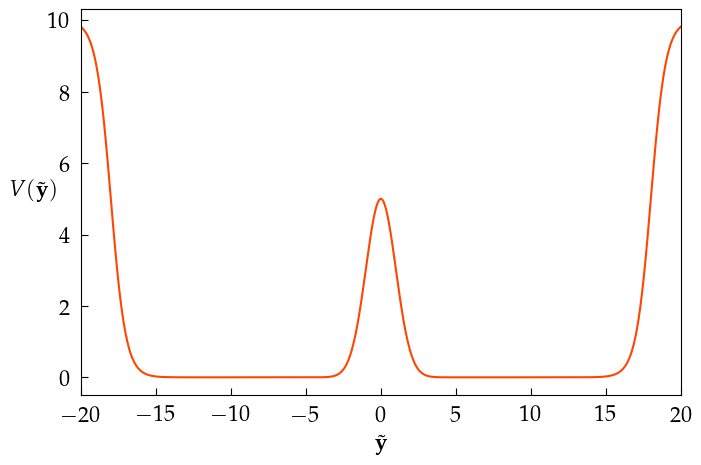

In [2]:

xmax = 30
ymax = 20

x = np.linspace(-xmax,xmax,1000)
y = np.linspace(-ymax,ymax,1000)

def u_tanh(y,r2,B,w):
    
    return B * (np.tanh((y - r2) / w) + 1) + B * (np.tanh((-r2 - y) / w) + 1)

def u_exp(y,A):
    return A*np.exp(-y**2/2)

def u(y,r2,b,w,A):
    return u_tanh(y,r2,b,w) + u_exp(y,A)

A = 5
B = 5
w = 1
r2 = ymax - 2

#plt.axhline(y=0, color='black', linestyle='-', lw = 0.5)
fig = plt.figure()

plt.plot(y,u(y,r2,B,w,A),label='total', lw = 1.5, c = 'orangered')
plt.xlim(-ymax,ymax)

plt.xlabel(r'$\tilde{\bf{y}}$')
plt.ylabel(r'$V(\tilde{\bf{y}}) $', labelpad = 10, rotation = 0)

aspect_ratio = 1.618
fig.set_size_inches(8, 8 / aspect_ratio)

dir = '''/Users/andonizaballa/Desktop/ANDONI/UNIBERTSITATEA/MASTER/MASTHER'S THESIS/THESIS/Chapters/images/ch04/total_potential.png'''

plt.savefig(dir, dpi = 300, bbox_inches = 'tight')

dir = '''/Users/andonizaballa/Desktop/ANDONI/UNIBERTSITATEA/MASTER/MASTHER'S THESIS/CODE/data/'''

os.chdir(dir)



/Users/andonizaballa/Desktop/ANDONI/UNIBERTSITATEA/MASTER/MASTHER'S THESIS/CODE/data


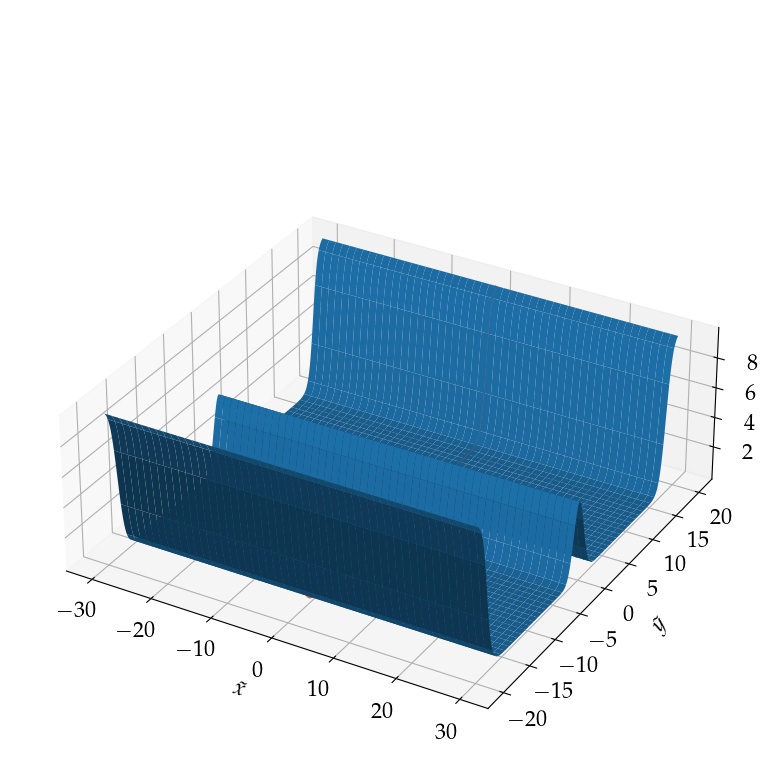

In [3]:
#Now we will make the 3d plot

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)

Z = u(Y,r2,B,w,A)

ax.plot_surface(X, Y, Z, linewidth=0 )

ax.set_xlabel(r'$\tilde{x}$', labelpad = 15, rotation = 0)
ax.set_ylabel(r'$\tilde{y}$', labelpad = 15, rotation = 0)
ax.set_zlabel(r'$V(\tilde{x},\tilde{y})$', labelpad = 15, rotation = 0)

#ax.plot_surface(X, Y, Z, edgecolor='royalblue')


ax.contour(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')







# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 2, 1, 2]))

dir = os.getcwd()

print(dir)

In [4]:


def extract_number(filename):
    # Regular expression to match the numerical part of the file name
    match = re.search(r'-([0-9]+)', filename)

    
    if match:
        return (-1)*int(match.group())
    else:
        return -1  # Return -1 if no number found

def plot_graph_dens(dir, file_name):

    os.chdir(dir)

    #Open the file
    x , y , density  = np.loadtxt(file_name, unpack=True)

    os.chdir('..')

    return x , y , density 

def plot_graph_vel(dir, file_name):

    os.chdir(dir)

    #Open the file
    x , y , vx , vy  = np.loadtxt(file_name, unpack=True)

    os.chdir('..')

    return x , y , vx , vy

def tanh_vel(x,deltav,delta):
    return deltav / 2.0 * np.tanh(x / delta)

def plot_velocity_profile(xprof,file):

    os.chdir('vel2')

    figure_features()

    x , y , vx , vy  = np.loadtxt(file, unpack=True)

    time = extract_number(file)

    #print(time)

    # We want to plot y versus vx for a given value of x 

    for xnum in x:
        # Get the index of the x value
        
        if xnum == xprof :
            index = np.where(x == xnum)
            xlabel = xnum

    popt , pcov = curve_fit(tanh_vel, y[index], vx[index])

    os.chdir('..')

    return y[index], vx[index], tanh_vel(y[index],popt[0],popt[1])

fig, axs = plt.subplots(1,4,figsize=(47,7), gridspec_kw={'width_ratios': [1, 3, 3, 3]}, sharey=True)

y1 , vx1 , tanh = plot_velocity_profile(17.8125,'vel2-015.dat')

x , y , density = plot_graph_dens('density','dens-015.dat')

x , y , phase = plot_graph_dens('phase','phase-015.dat')

x , y , vx, vy = plot_graph_vel('vel2','vel2-015.dat')

axs[0].plot(vx1,y1, label = 'Velocity in $x$ direction', lw = 1.5, c = 'royalblue')
#axs[0].plot(y,tanh, label = 'Fit', lw = 1.5, c = 'orangered')
scatter1 = axs[1].scatter(x, y, c = density, vmin = 0, vmax = 6E-4,  cmap = 'plasma', marker = 'o')
scatter2 = axs[2].scatter(x, y, c = phase, vmin = 0, vmax = 2*np.pi,  cmap = 'plasma', marker = 'o')
scatter3 = axs[3].scatter(x, y, c = vx, vmin = -0.5E-8, vmax = 0.5E-8,  cmap = 'viridis', marker = 'o')

fig.colorbar(scatter1, ax=axs[1])
fig.colorbar(scatter2, ax=axs[2])
fig.colorbar(scatter3, ax=axs[3])

#Limits of each axis
axs[0].set_xlim(-0.5E-8,0.5E-8)
axs[0].set_ylim(-17,17)

axs[1].set_xlim(-30,30)
axs[1].set_ylim(-20,20)

axs[2].set_xlim(-30,30)
axs[2].set_ylim(-20,20)

axs[3].set_xlim(-30,30)
axs[3].set_ylim(-20,20)


axs[1].set_title('Density')
axs[2].set_title('Phase')
axs[3].set_title('Velocity in $x$ direction')

#Labels 

axs[0].set_xlabel(r'$v_x$')
axs[0].set_ylabel(r'$\tilde{y}', labelpad = 10, rotation = 0)

axs[1].set_xlabel(r'$\tilde{x}$')

axs[2].set_xlabel(r'$\tilde{x}$')

axs[3].set_xlabel(r'$\tilde{x}$')




Text(0.5, 0, '$\\tilde{x}$')

Error in callback <function _draw_all_if_interactive at 0x7f8fe8aa0790> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$\\\\tilde{y}'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpsu8p8csg 978b2a851b329fc6dec2b0586dc08190.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./978b2a851b329fc6dec2b0586dc08190.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/mathpazo.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2020/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 978b2a851b329fc6dec2b0586dc08190.aux.
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1ppl.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omlzplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omszplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omxzplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1zplm.fd)
! Extra }, or forgotten $.
l.30 {\rmfamily $\tilde{y}}
                           %
No pages of output.
Transcript written on tmpsu8p8csg/978b2a851b329fc6dec2b0586dc08190.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\tilde{y}'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpnkyml3av 978b2a851b329fc6dec2b0586dc08190.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./978b2a851b329fc6dec2b0586dc08190.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/mathpazo.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2020/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 978b2a851b329fc6dec2b0586dc08190.aux.
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1ppl.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omlzplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omszplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omxzplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1zplm.fd)
! Extra }, or forgotten $.
l.30 {\rmfamily $\tilde{y}}
                           %
No pages of output.
Transcript written on tmpnkyml3av/978b2a851b329fc6dec2b0586dc08190.log.




<Figure size 4700x700 with 7 Axes>